<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
sat_scores_csv = './sat_scores.csv'
sat_scores = pd.read_csv(sat_scores_csv)
sat_scores.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [3]:
#sat_scores_dict = sat_scores.to_dict(orient='dict')
#print sat_scores_dict['Math']

In [4]:
sat_scores.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In the data dataframe, stats are strings and as such the column is designated an object. All other values are integers.

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [5]:
sat_scores.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


The dataset includes 52 rows, with, I'm presuming, the SAT participation rate for high school senior as well as average verbal and math scores.

In [6]:
sat_scores['State'].unique()

array(['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE',
       'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI',
       'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM',
       'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA',
       'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], dtype=object)

In [7]:
sat_scores = sat_scores[:-1]
sat_scores.tail(2)

,State,Rate,Verbal,Math
49,ND,4,592,599
50,MS,4,566,551


Checking the unique values in the state column, we find an 'All' in the last row. There is no state called 'All'. 'All' is dropped.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [8]:
sat_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
State     51 non-null object
Rate      51 non-null int64
Verbal    51 non-null int64
Math      51 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


The info method describes our data as described: 51 rows in 4 columns of non-null objects and strings. The addition needed for this to truly meet the requirements above would be a longer description of the contents as described above.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

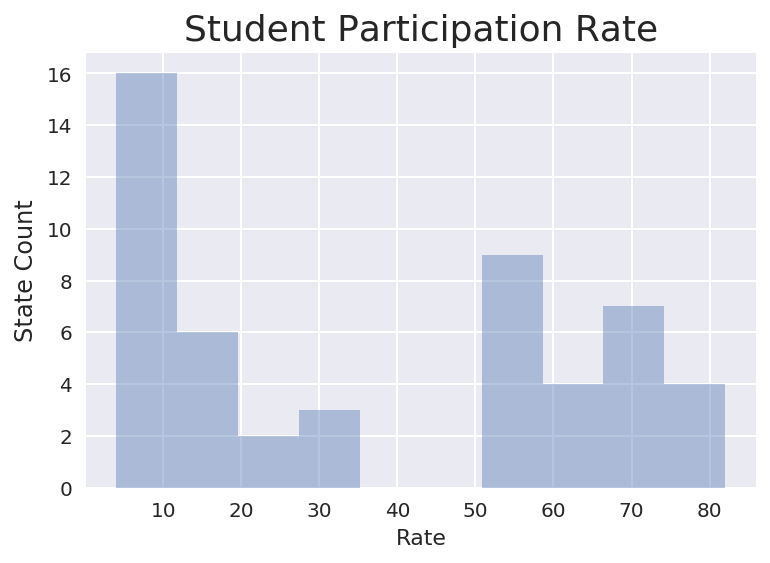

In [86]:
spotty_cow = sns.distplot(sat_scores['Rate'], bins=10, kde=False)

spotty_cow.set_ylabel('State Count', fontsize=12)
spotty_cow.set_title('Student Participation Rate', fontsize=18)

The histogram visualizes the divide between majority and minority participation states.

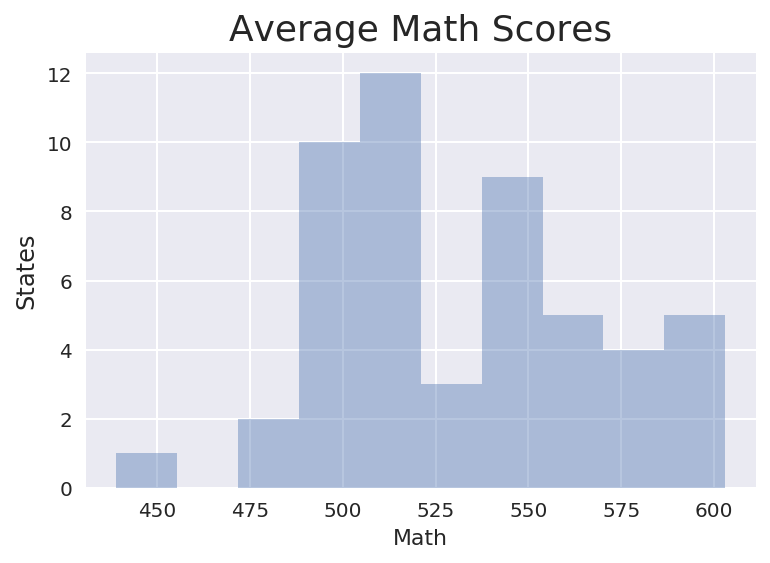

In [70]:
ax = sns.distplot(sat_scores['Math'], bins=10, kde=False, label='Average Math Score')

ax.set_ylabel('States', fontsize=12)
ax.set_title('Average Math Scores', fontsize=18)

Average math scores are positively skewed, though, as with verbal scores, the scores are unweighted - a state with a 4 percent participation rate counts equally next to another state with an 80 percent participation rate in this histogram.

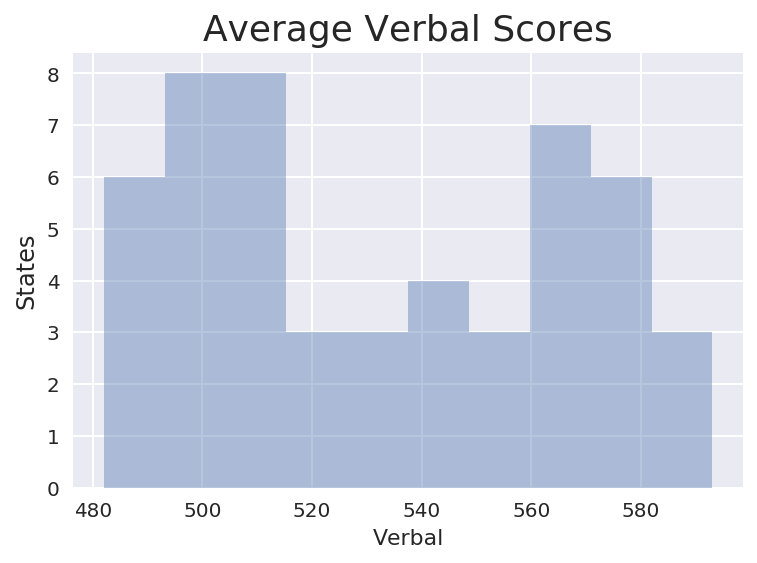

In [72]:
ax = sns.distplot(sat_scores['Verbal'], bins=10, kde=False, label='Average Verbal Score')

ax.set_ylabel('States', fontsize=12)
ax.set_title('Average Verbal Scores', fontsize=18)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

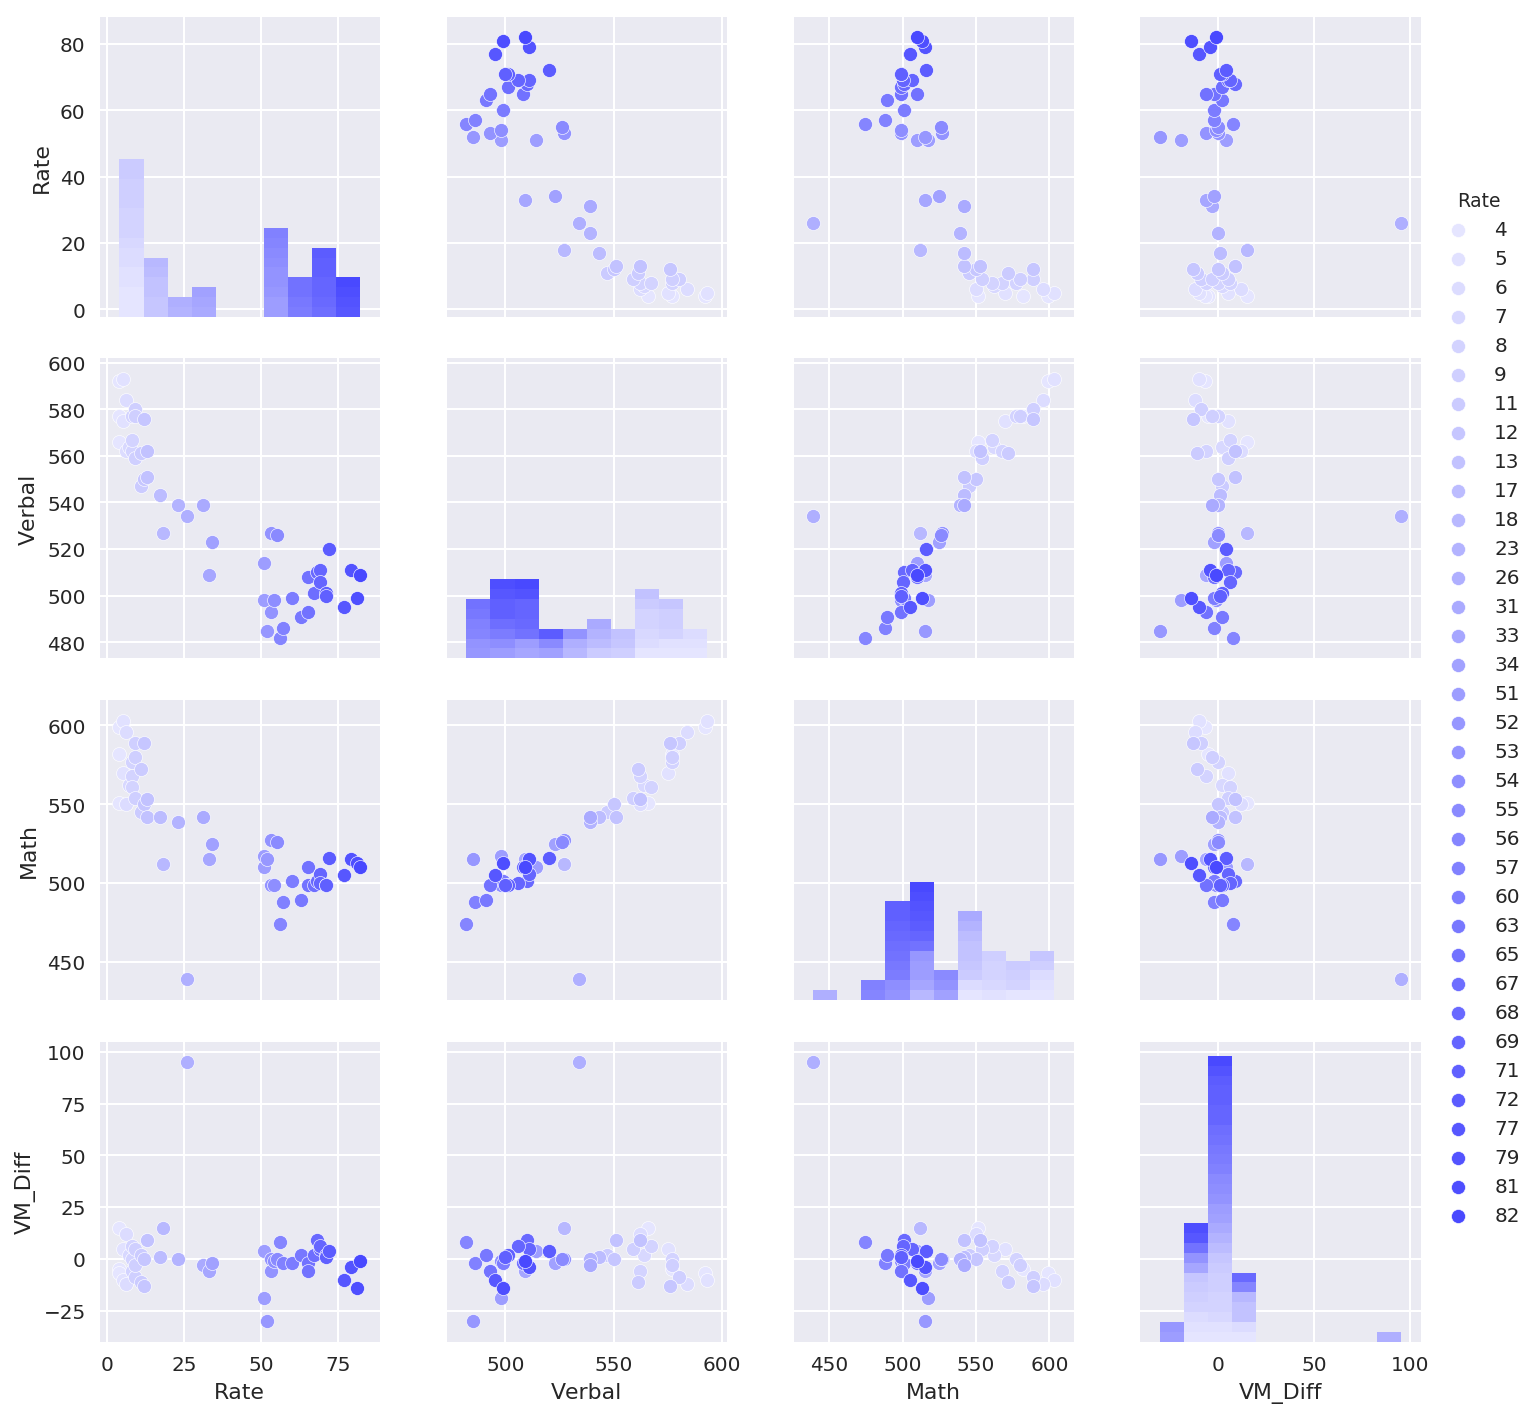

In [85]:
sns.pairplot(sat_scores, hue='Rate', palette=sns.light_palette('blue',len(sat_scores))) #color scaling like this d

These pairplots demonstate clear negative correlations with average scores and participation rates as well as a strong correlation between math and verbal scores.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

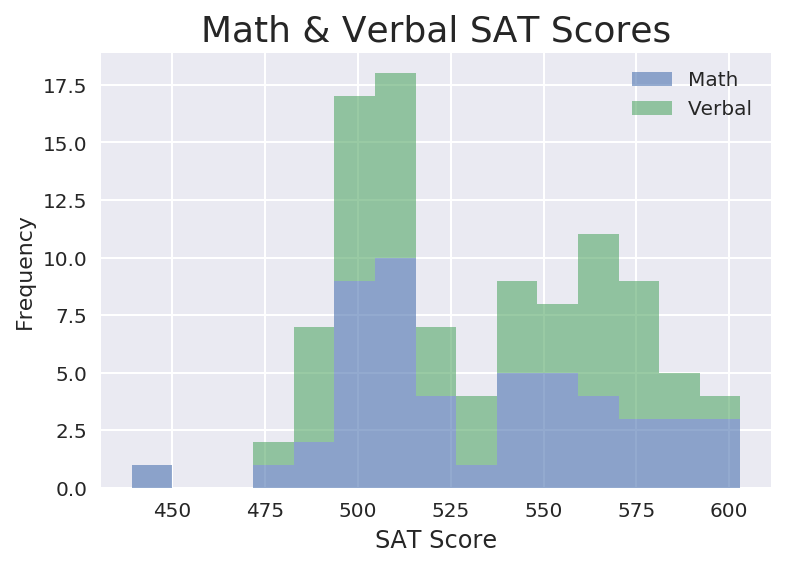

In [73]:
sat_mv_only = sat_scores[['Math','Verbal']]
ax = sat_mv_only.plot.hist(stacked=True, alpha=.6, bins=15)

ax.set_xlabel('SAT Score', fontsize=12)
ax.set_title('Math & Verbal SAT Scores', fontsize=18)

Stacking math and verbal scores on the same plot shows the similarity of score distributions.

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

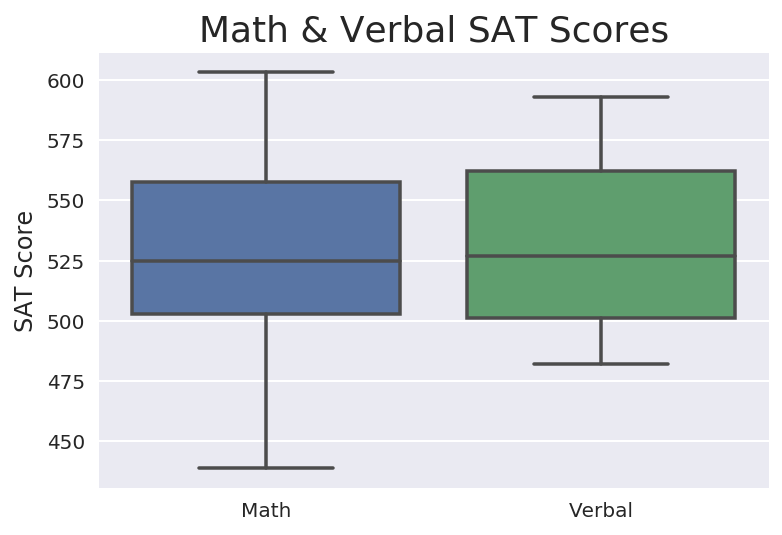

In [74]:
ax = sns.boxplot(sat_mv_only)

ax.set_ylabel('SAT Score', fontsize=12)
ax.set_title('Math & Verbal SAT Scores', fontsize=18)

The box plot shows us the greater spread in verbal scores in the IQR relative to math while also showing the greater spread in math data overall.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [15]:
sat_rmv_only = sat_scores[['Math','Verbal', 'Rate']]

sat_scores_norm = (sat_rmv_only - sat_rmv_only.mean()) / sat_rmv_only.std()
sat_scores_norm.head()

,Math,Verbal,Rate
0,-0.601948,-0.705304,1.633353
1,-0.519275,-1.005058,1.597057
2,-0.464159,-0.645353,1.524463
3,-0.739737,-1.124960,1.451870
4,-0.436602,-0.375574,1.270386


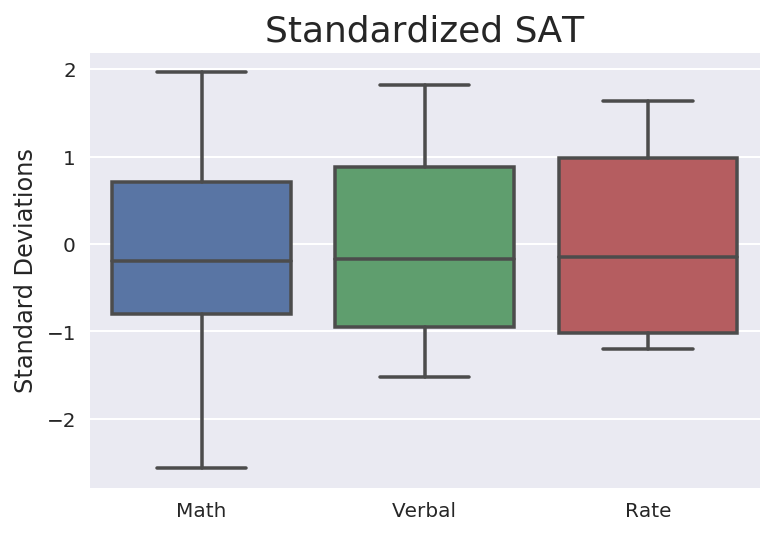

In [16]:
ax = sns.boxplot(sat_scores_norm)

ax.set_ylabel('Standard Deviations', fontsize=12)
ax.set_title('Standardized SAT', fontsize=18)

plt.show()

Because of the different scoring scales, it would be impractical to plot the rate data next to math and verbal data. I've standardized the values for a side-by-side comparison, which functions to show the spread of the data in each column.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [17]:
mean_mask = sat_scores['Verbal'] > sat_scores['Verbal'].mean()

In [92]:
print 'Mean Verbal: ' + str(int(sat_scores['Verbal'].mean()))
print 'States above Mean Verbal: ' + str(len(sat_scores.ix[mean_mask, ['State','Verbal']]))
print sat_scores.ix[mean_mask, ['State','Verbal']]

Mean Verbal: 532
States above Mean Verbal: 24
   State  Verbal
26    CO     539
27    OH     534
28    MT     539
30    ID     543
31    TN     562
32    NM     551
33    IL     576
34    KY     550
35    WY     547
36    MI     561
37    MN     580
38    KS     577
39    AL     559
40    NE     562
41    OK     567
42    MO     577
43    LA     564
44    WI     584
45    AR     562
46    UT     575
47    IA     593
48    SD     577
49    ND     592
50    MS     566


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [19]:
median_mask = sat_scores['Verbal'] > sat_scores['Verbal'].median()

In [91]:
print 'Median Verbal: ' + str(int(sat_scores['Verbal'].median()))
print 'States above Median Verbal: ' + str(len(sat_scores.ix[median_mask, ['State','Verbal']]))
print sat_scores.ix[median_mask, ['State','Verbal']]

Median Verbal: 527
States above Median Verbal: 24
   State  Verbal
26    CO     539
27    OH     534
28    MT     539
30    ID     543
31    TN     562
32    NM     551
33    IL     576
34    KY     550
35    WY     547
36    MI     561
37    MN     580
38    KS     577
39    AL     559
40    NE     562
41    OK     567
42    MO     577
43    LA     564
44    WI     584
45    AR     562
46    UT     575
47    IA     593
48    SD     577
49    ND     592
50    MS     566


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [21]:
sat_scores['VM_Diff'] = sat_scores['Verbal'] - sat_scores['Math']
sat_scores.head()

,State,Rate,Verbal,Math,VM_Diff
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [62]:
top_verbal_diff = sat_scores.sort_values('VM_Diff', ascending=False)[:10]
top_verbal_diff.head(3)

,State,Rate,Verbal,Math,VM_Diff
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15


In [22]:
top_math_diff = sat_scores.sort_values('VM_Diff')[:10]
top_math_diff.head(3)

,State,Rate,Verbal,Math,VM_Diff
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [24]:
sat_rmv_only.corr()

,Math,Verbal,Rate
Math,1.000000,0.899909,-0.773419
Verbal,0.899909,1.000000,-0.888121
Rate,-0.773419,-0.888121,1.000000


As the plots showed, math and verbal are highly correlated and both are negatively correlated with rate.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [25]:
sat_rmv_only.describe()

,Math,Verbal,Rate
count,51.000000,51.000000,51.000000
mean,531.843137,532.529412,37.000000
std,36.287393,33.360667,27.550681
min,439.000000,482.000000,4.000000
25%,503.000000,501.000000,9.000000
50%,525.000000,527.000000,33.000000
75%,557.500000,562.000000,64.000000
max,603.000000,593.000000,82.000000


We see, by row: the number of entries (count); the mean; standard deviation (std); 0% (min), 25%, median (50%), 75%, and 100% (max) values.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [26]:
sat_rmv_only.cov()

,Math,Verbal,Rate
Math,1316.774902,1089.404706,-773.22
Verbal,1089.404706,1112.934118,-816.28
Rate,-773.220000,-816.280000,759.04


As with the correlation matrix, Math and Verbal have positive covariance as well as negative covariance with rate. It seems like correlation is a scaled version of covariance and thus far more intuitive.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [27]:
drugs_csv = './drug-use-by-age.csv'
drugs = pd.read_csv(drugs_csv)
drugs.tail()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
12,26-29,2628,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,...,1.2,13.5,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0
13,30-34,2864,77.5,52.0,16.4,72.0,2.1,8.0,0.5,15.0,...,0.9,46.0,3.6,8.0,1.4,12.0,0.4,54.0,0.4,10.0
14,35-49,7391,75.0,52.0,10.4,48.0,1.5,15.0,0.5,48.0,...,0.3,12.0,1.9,6.0,0.6,24.0,0.2,104.0,0.3,10.0
15,50-64,3923,67.2,52.0,7.3,52.0,0.9,36.0,0.4,62.0,...,0.4,5.0,1.4,10.0,0.3,24.0,0.2,30.0,0.2,104.0
16,65+,2448,49.3,52.0,1.2,36.0,0.0,-,0.0,-,...,0.0,-,0.2,5.0,0.0,364.0,0.0,-,0.0,15.0


In [28]:
drugs.shape

(17, 28)

In [29]:
drugs.isnull().sum()

age                        0
n                          0
alcohol-use                0
alcohol-frequency          0
marijuana-use              0
marijuana-frequency        0
cocaine-use                0
cocaine-frequency          0
crack-use                  0
crack-frequency            0
heroin-use                 0
heroin-frequency           0
hallucinogen-use           0
hallucinogen-frequency     0
inhalant-use               0
inhalant-frequency         0
pain-releiver-use          0
pain-releiver-frequency    0
oxycontin-use              0
oxycontin-frequency        0
tranquilizer-use           0
tranquilizer-frequency     0
stimulant-use              0
stimulant-frequency        0
meth-use                   0
meth-frequency             0
sedative-use               0
sedative-frequency         0
dtype: int64

In [30]:
drugs.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

The frequency values are objects; they should be numbers.

In [31]:
drugs['cocaine-frequency'].unique()


array(['5.0', '1.0', '5.5', '4.0', '7.0', '8.0', '6.0', '15.0', '36.0', '-'], dtype=object)

The '-' is the culprit - they need to be converted to NaNs.

In [32]:
drugs['cocaine-frequency'] = pd.to_numeric(drugs['cocaine-frequency'], errors='coerce')

In [33]:
drugs['crack-frequency'] = pd.to_numeric(drugs['crack-frequency'], errors='coerce')

In [34]:
drugs['heroin-frequency'] = pd.to_numeric(drugs['heroin-frequency'], errors='coerce')

In [35]:
drugs['inhalant-frequency'] = pd.to_numeric(drugs['inhalant-frequency'], errors='coerce')

In [36]:
drugs['oxycontin-frequency'] = pd.to_numeric(drugs['oxycontin-frequency'], errors='coerce')

In [37]:
drugs['meth-frequency'] = pd.to_numeric(drugs['meth-frequency'], errors='coerce')

In [38]:
#for e in drugs['age']:
#    i = 0
#    if len(e)>2:
#        drugs['age'][i] = e[0:2]
#        i = i + 1
#    i = i+1

drugs['age'][10] = 22.5
drugs['age'][11] = 24.5
drugs['age'][12] = 27.5
drugs['age'][13] = 32
drugs['age'][14] = 42
drugs['age'][15] = 57
drugs['age'][16] = 65

/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be

Ages are essential to the analysis and need to be converted. I chose to talke the average where there were two values. I manually set these; in the future I will need to know a way to convert string values in a column where a simple replace or remove won't suffice.

In [39]:
drugs['age']

0       12
1       13
2       14
3       15
4       16
5       17
6       18
7       19
8       20
9       21
10    22.5
11    24.5
12    27.5
13      32
14      42
15      57
16      65
Name: age, dtype: object

In [40]:
drugs['age'] = pd.to_numeric(drugs['age'])

In [41]:
drugs.dtypes

age                        float64
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency          float64
crack-use                  float64
crack-frequency            float64
heroin-use                 float64
heroin-frequency           float64
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency         float64
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency        float64
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency             float64
sedative-use               float64
sedative-frequency         float64
dtype: object

In [42]:
drugs.isnull().sum()

age                        0
n                          0
alcohol-use                0
alcohol-frequency          0
marijuana-use              0
marijuana-frequency        0
cocaine-use                0
cocaine-frequency          1
crack-use                  0
crack-frequency            3
heroin-use                 0
heroin-frequency           1
hallucinogen-use           0
hallucinogen-frequency     0
inhalant-use               0
inhalant-frequency         1
pain-releiver-use          0
pain-releiver-frequency    0
oxycontin-use              0
oxycontin-frequency        1
tranquilizer-use           0
tranquilizer-frequency     0
stimulant-use              0
stimulant-frequency        0
meth-use                   0
meth-frequency             2
sedative-use               0
sedative-frequency         0
dtype: int64

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [102]:
percent_users = drugs[['age', 'alcohol-use', 'marijuana-use', 'cocaine-use',
       'crack-use', 'heroin-use', 'hallucinogen-use', 'inhalant-use', 'pain-releiver-use',
       'oxycontin-use', 'tranquilizer-use', 'stimulant-use', 'meth-use', 'sedative-use']]

In [ ]:
median_frequency = drugs[['age', 'alcohol-frequency', 'marijuana-frequency', 'cocaine-frequency',
       'crack-frequency', 'heroin-frequency', 'hallucinogen-frequency', 'inhalant-frequency', 
        'pain-releiver-frequency','oxycontin-frequency', 'tranquilizer-frequency', 'stimulant-frequency',
       'meth-frequency', 'sedative-frequency']]

Separating percent users and use frequency into two dataframes.

In [45]:
#sns.pairplot(percent_users)

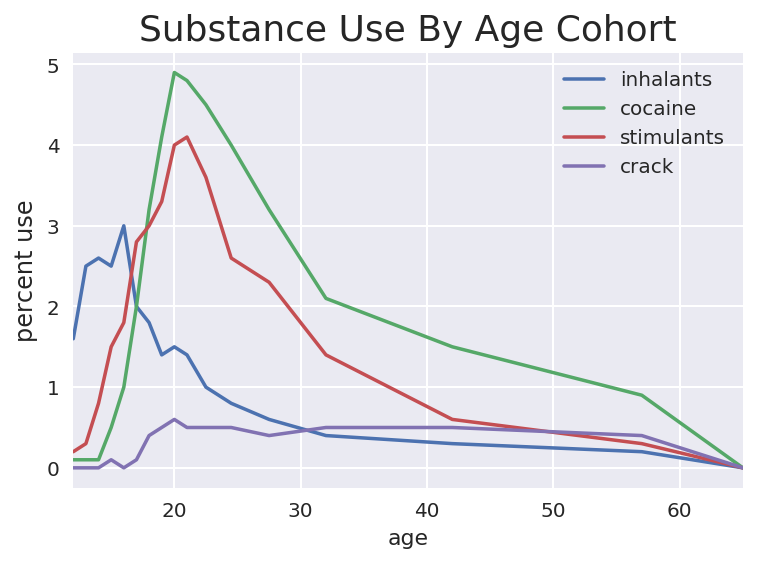

In [98]:
ax = percent_users.plot(x='age', y='inhalant-use', label ='inhalants')
ax.set_ylabel('percent use', fontsize=12)
ax.set_title('Substance Use By Age Cohort', fontsize=18)
percent_users.plot(x='age', y='cocaine-use', label ='cocaine', ax=ax)
percent_users.plot(x='age', y='stimulant-use', label ='stimulants', ax=ax)
percent_users.plot(x='age', y='crack-use', label ='crack', ax=ax)

Most drugs rise sharply during the teenage years and spike in the number of users at college ages, followed by sharp decline. 

Inhalants peaking earlier than other substances and then face the same pattern of decline. Crack notably persists at close to peak rates until the penultimate age cohort.

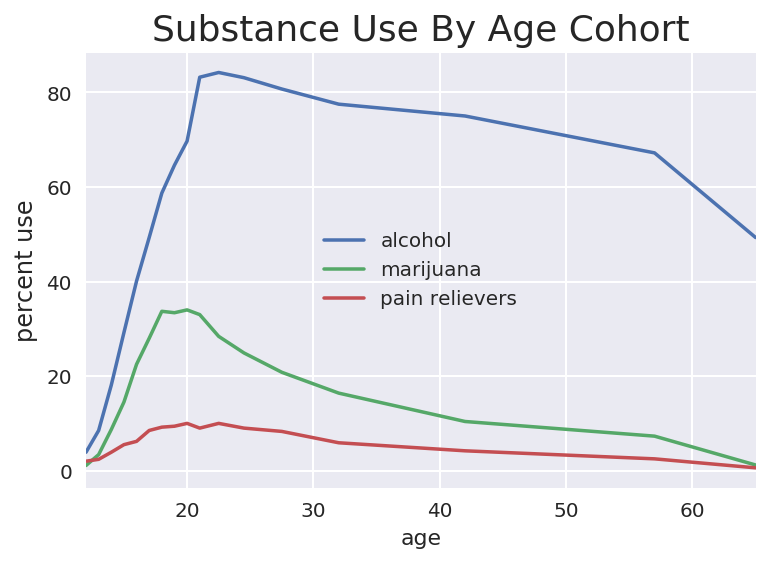

In [103]:
ax = percent_users.plot(x='age', y='alcohol-use', label ='alcohol')
ax.set_ylabel('percent use', fontsize=12)
ax.set_title('Substance Use By Age Cohort', fontsize=18)
percent_users.plot(x='age', y='marijuana-use', label ='marijuana', ax=ax)
percent_users.plot(x='age', y='pain-releiver-use', label ='pain relievers', ax=ax)

Alcohol use has a similar shape to other substances, with a college-age peak followed by an albeit more gradual decline.

In [104]:
percent_users_correlations = percent_users.corr()
percent_users_correlations.head(3)

,age,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
age,1.000000,0.367742,-0.380299,-0.186837,0.148656,-0.200053,-0.417828,-0.803968,-0.438547,-0.388914,-0.254427,-0.407329,-0.268959,-0.364657
alcohol-use,0.367742,1.000000,0.594165,0.773458,0.877378,0.677614,0.463702,-0.648248,0.617523,0.589219,0.735785,0.582241,0.682531,0.318268
marijuana-use,-0.380299,0.594165,1.000000,0.883789,0.620670,0.711613,0.959353,0.127336,0.966226,0.971733,0.935199,0.968096,0.870446,0.616766


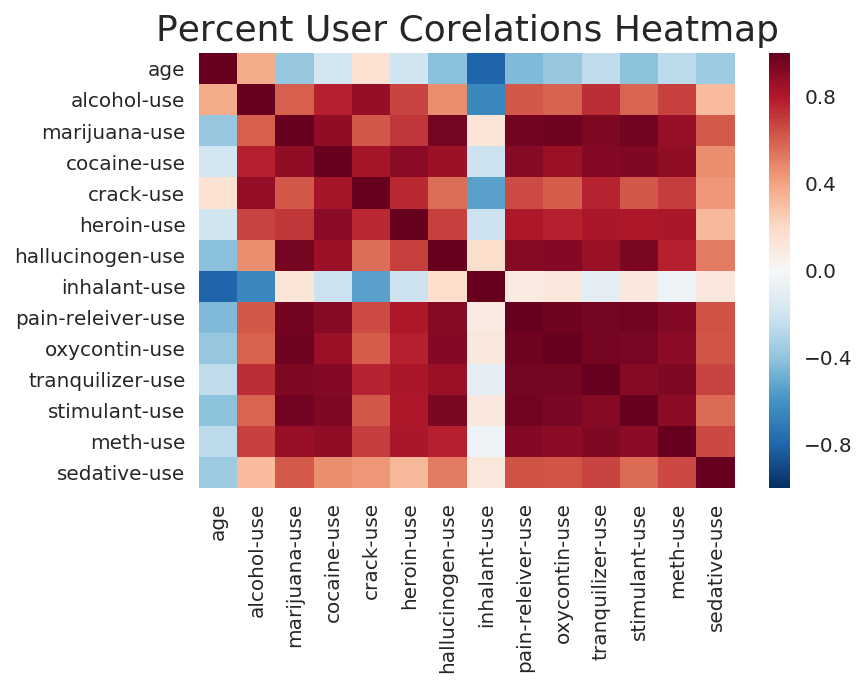

In [48]:
percent_users_correlations = percent_users.corr()
ax = sns.heatmap(percent_users_correlations)

ax.set_title('Percent User Corelations Heatmap', fontsize=18)

Many drugs have exceptionally high (>.9) correlations in percent users, suggesting overlap in users of substances.

In [49]:
percent_users.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,17.0,25.617647,15.356726,12.0,16.0,20.0,27.5,65.0
alcohol-use,17.0,55.429412,26.878866,3.9,40.1,64.6,77.5,84.2
marijuana-use,17.0,18.923529,11.959752,1.1,8.7,20.8,28.4,34.0
cocaine-use,17.0,2.176471,1.816772,0.0,0.5,2.0,4.0,4.9
crack-use,17.0,0.294118,0.235772,0.0,0.0,0.4,0.5,0.6
heroin-use,17.0,0.352941,0.333762,0.0,0.1,0.2,0.6,1.1
hallucinogen-use,17.0,3.394118,2.792506,0.1,0.6,3.2,5.2,8.6
inhalant-use,17.0,1.388235,0.927283,0.0,0.6,1.4,2.0,3.0
pain-releiver-use,17.0,6.270588,3.166379,0.6,3.9,6.2,9.0,10.0
oxycontin-use,17.0,0.935294,0.608216,0.0,0.4,1.1,1.4,1.7


The summary statistics evince the vast difference between alcohol users, to a lesser extent marijuana users, and every other substance. 55 percent of participants use alchohol, and it's the only substance used by more than a third of an age cohort at any given time. In absolute terms, the range of alcohol use over time is massive. Marijuana similarly has many more users at peak ages than not. On a smaller scale, cocaine and hallucinogens show large disparities between peak ages and otherwise. Other drugs, such as sedatives and meth, have narrower bands of usage over time.

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


I hypothesize that like percent users by age cohort, frequency of use among users is highest among the young across substances.

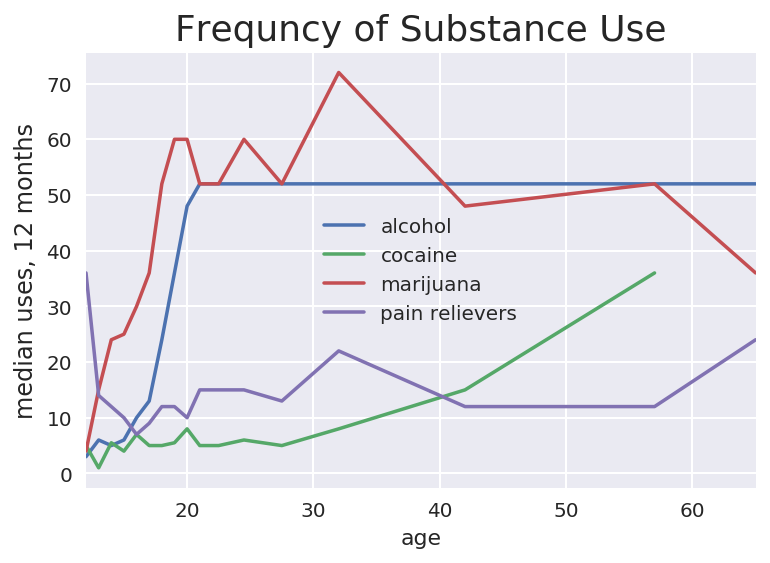

In [52]:
ax = median_frequency.plot(x='age', y='alcohol-frequency', label ='alcohol')
ax.set_ylabel('median uses, 12 months', fontsize=12)
ax.set_title('Frequncy of Substance Use', fontsize=18)
median_frequency.plot(x='age', y='cocaine-frequency', label ='cocaine', ax=ax)
median_frequency.plot(x='age', y='marijuana-frequency', label ='marijuana', ax=ax)
median_frequency.plot(x='age', y='pain-releiver-frequency', label ='pain relievers', ax=ax)

**Report**



The above chart invalidates my hypothesis, showing that frequency of substance use can wax or wane over time depending on the drug. This is perhaps a function of more disposable income and attrition of casual users as people age.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

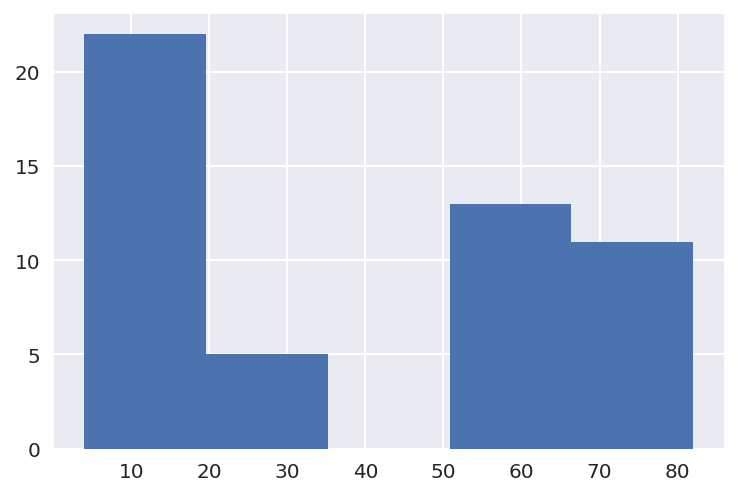

In [53]:
#q1 = sat_scores['Rate'].quantile(q=.25)
#q2 = sat_scores['Rate'].quantile(q=.75)
#print q2
sat_scores['Rate'].hist(bins=5)

In [54]:
rate_mask = sat_scores['Rate'] > 20
clean_sat = sat_scores[rate_mask]

Without a good standard for outliers, I chose to remove the low participation states as defined by having a participation rate lower than 20 percent.

In [55]:
sat_scores.describe()

,Rate,Verbal,Math,VM_Diff
count,51.000000,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137,0.686275
std,27.550681,33.360667,36.287393,15.839811
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,503.000000,-6.000000
50%,33.000000,527.000000,525.000000,0.000000
75%,64.000000,562.000000,557.500000,4.500000
max,82.000000,593.000000,603.000000,95.000000


In [56]:
clean_sat.describe()

,Rate,Verbal,Math,VM_Diff
count,29.000000,29.000000,29.000000,29.000000
mean,58.206897,507.137931,506.103448,1.034483
std,16.237917,15.601566,19.507041,19.778204
min,23.000000,482.000000,439.000000,-30.000000
25%,52.000000,498.000000,499.000000,-4.000000
50%,60.000000,506.000000,506.000000,-1.000000
75%,69.000000,514.000000,515.000000,2.000000
max,82.000000,539.000000,542.000000,95.000000


Unsurprisingly, given what we know about correlations between variables, when low participation states are removed, the distribution of scores shifts lower and the spread of scores is tighter.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [107]:
sat_scores.corr(method='pearson')

,Rate,Verbal,Math,VM_Diff
Rate,1.000000,-0.888121,-0.773419,-0.098671
Verbal,-0.888121,1.000000,0.899909,0.044527
Math,-0.773419,0.899909,1.000000,-0.395574
VM_Diff,-0.098671,0.044527,-0.395574,1.000000


In [108]:
sat_scores.corr(method='spearman')

,Rate,Verbal,Math,VM_Diff
Rate,1.000000,-0.836058,-0.811662,-0.012267
Verbal,-0.836058,1.000000,0.909413,0.042032
Math,-0.811662,0.909413,1.000000,-0.248781
VM_Diff,-0.012267,0.042032,-0.248781,1.000000


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.